In [1]:
# %pip install -r ../requirements.txt

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/WPP2024_Demographic_Indicators_Medium.csv', low_memory=False)
location = 'Europe (48)'
df_by_location = df[df['Location'] == location]

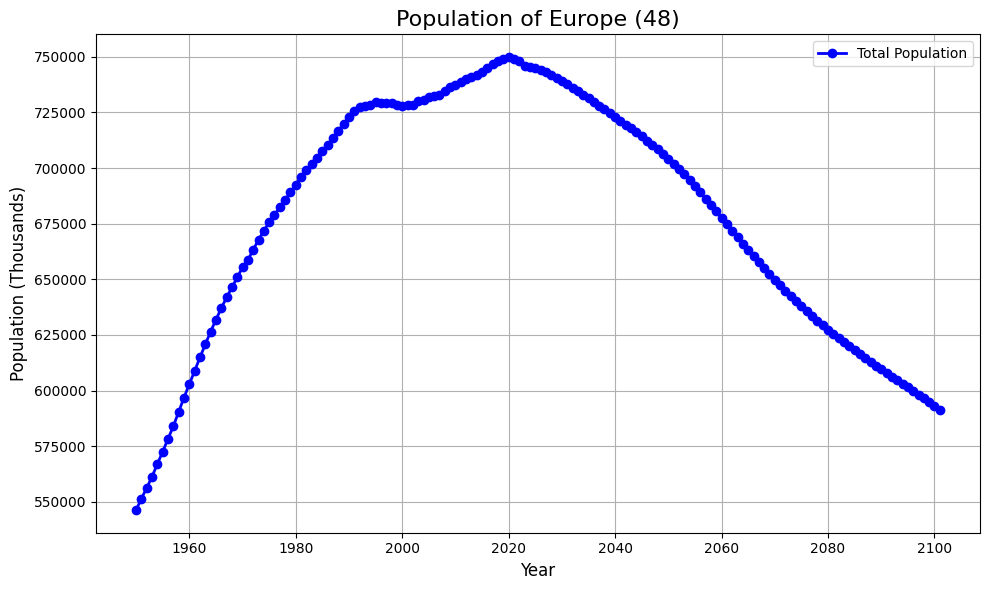

In [11]:
population = df_by_location[['Time', 'TPopulation1Jan']] 

plt.figure(figsize=(10, 6))  
plt.plot(population['Time'], population['TPopulation1Jan'], color='blue', linewidth=2, marker='o', label='Total Population')
plt.title(f'Population of {location}', fontsize=16)  
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population (Thousands)', fontsize=12)
plt.grid(True)  
plt.legend() 
plt.tight_layout()  
plt.show()

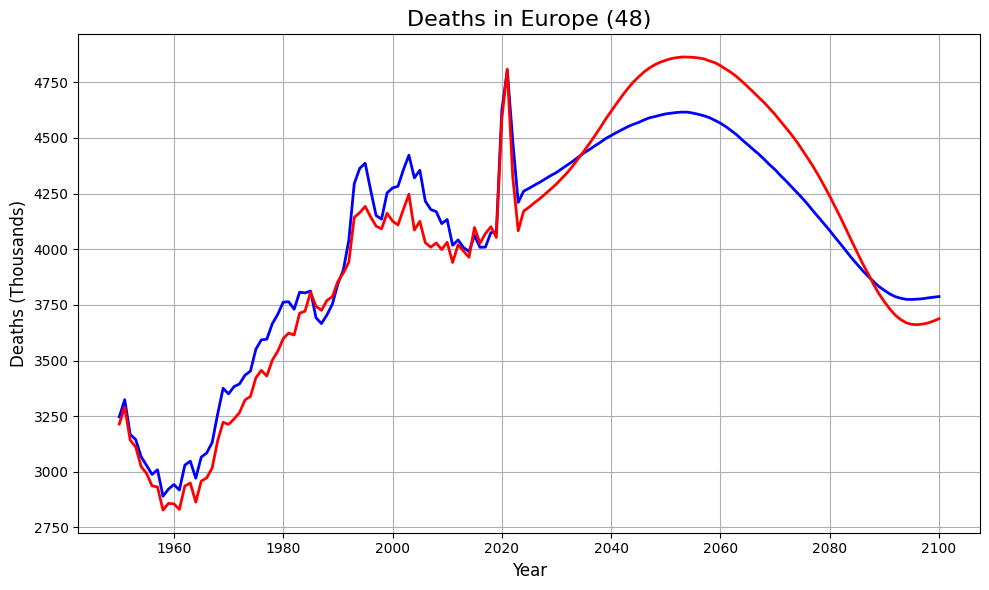

In [13]:
male_deaths = df_by_location[['Time', 'DeathsMale']]
female_deaths = df_by_location[['Time', 'DeathsFemale']]

plt.figure(figsize=(10, 6))
plt.plot(male_deaths['Time'], male_deaths['DeathsMale'], color='blue', linewidth=2, label='Male Deaths')
plt.plot(female_deaths['Time'], female_deaths['DeathsFemale'], color='red', linewidth=2, label='Female Deaths')
plt.title(f'Deaths in {location}', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Deaths (Thousands)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

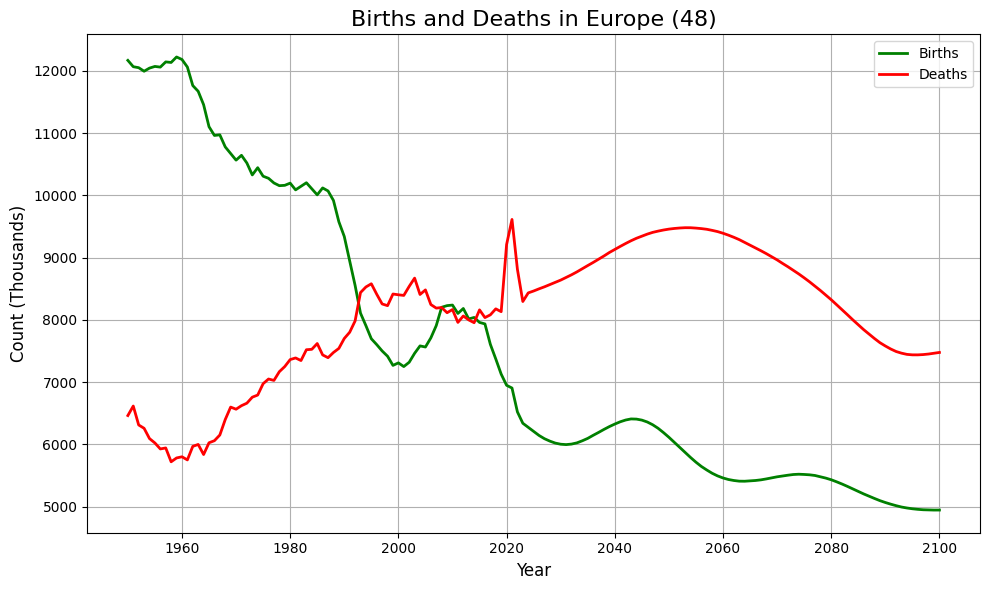

In [14]:
births = df_by_location[['Time', 'Births']]
deaths = df_by_location[['Time', 'Deaths']]

plt.figure(figsize=(10, 6))
plt.plot(births['Time'], births['Births'], color='green', linewidth=2, label='Births')
plt.plot(deaths['Time'], deaths['Deaths'], color='red', linewidth=2, label='Deaths')
plt.title(f'Births and Deaths in {location}', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count (Thousands)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

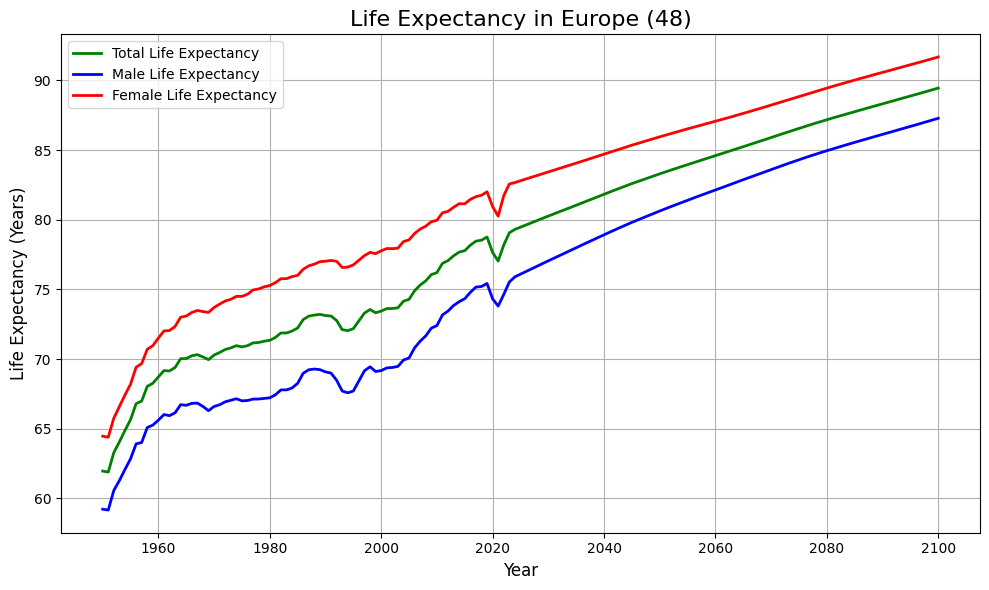

In [15]:
lex_total = df_by_location[['Time', 'LEx']]
lex_male = df_by_location[['Time', 'LExMale']]
lex_female = df_by_location[['Time', 'LExFemale']]

plt.figure(figsize=(10, 6))
plt.plot(lex_total['Time'], lex_total['LEx'], color='green', linewidth=2, label='Total Life Expectancy')
plt.plot(lex_male['Time'], lex_male['LExMale'], color='blue', linewidth=2, label='Male Life Expectancy')
plt.plot(lex_female['Time'], lex_female['LExFemale'], color='red', linewidth=2, label='Female Life Expectancy')
plt.title(f'Life Expectancy in {location}', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Expectancy (Years)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()